# Week 4 - Data Science in the Real World

## <font color='#1A9FFF'>Workshop Outline</font>
<ul>
    <li>What to consider for a real world data science project</li>
    <li>Case study: conversion rate analysis</li>
    <li>10 minute break</li>
</ul>

<ul>
    <li>Mini project</li>
</ul>

## <font color='#1A9FFF'>What to consider for a real world data science project?</font>
Things to keep in mind while doing a real world data science project:

**Understand business goals** - Always understand the business goals first. Your work will depend on the goals and the overall result is good only if you got them all correctly.

**Understand the data** - Always check with the data owner and business expert what the data represents. Don't make assumptions, just ask for clarification. 

**Check the data** - Never assume data is right. Always check data reliability and, if you find that some data doesn't make sense, clean it. 

**Build prototypes fast, then iterate** - Don't aim for the perfect model at first, build a prototype fast, present to the users to get feedback, and then improve it. 

**Don't make the solution over complicated** - You need to present the result to stakeholders who are highly likely to be non-technical. 

**Make sure your finding is actionable** - Focus on the business impact that your work could have. How would the company benefit from your analysis? How can your work generate actionable insights? What would you suggest as a next step?

## <font color='#1A9FFF'>Case study: Conversion Rate Analysis</font>
The conversion rate is the percentage of users who take a desired action, for example, buy a product, complete a survey or give a like on Facebook. Optimizing conversion rate is a very common work of a data scientist. 

We have data about users who visit a website: 
* Whether they converted or not 
* Some of their characteristics such as:
    * their country
    * their age
    * whether they are repeat users
    * marketing channel
    * the number of pages visited during that session (as a proxy for site activity/time spent on site).

The project is to:
* Analyse the conversion rate of different customer segments
* Come up with recommendations for the product team and the marketing team to improve the conversion rate. 

In [1]:
import numpy  as np
import pandas as pd              # import pandas for data wrangling
%matplotlib inline
import matplotlib.pyplot as plt  # import matplotlib for ploting

data = pd.read_csv('datasets/conversion_data.csv') # read data

### Data Structure 
After reading in the data, we first do some simple exploration, check available columns, data structure, and data summary.

In [2]:
data.head() # take a look at the first 5 rows

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
data.tail() # take a look at the last 5 rows 

,country,age,new_user,source,total_pages_visited,converted
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0
316199,UK,24,0,Ads,4,0


In [4]:
data.info() # data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
data.describe() # data summary

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### Data Dictionary
<font color='#1A9FFF'>**Note:**</font> It's always good to ask for a data dictionary to get better understanding of the meaning of each column.
* **country**: user country based on the IP address
* **age** : user age. Self-reported at sign-in step
* **new_user**: whether the user is a new user to the site
* **source**: marketing channel source 
    - Ads: came to the site by clicking on an advertisement
    - Seo: came to the site by clicking on search results
    - Direct: came to the site by directly typing the URL on the browser
    
    
* **total_pages_visited**: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
* **converted:**: 1 means they converted within the session, 0 means they left without buying anything

### Check the data
Let's take a look at the unique ages: 

In [6]:
data_unique_age = data['age'].unique()          # get unique age in dataset -> return a numpy narray
data_unique_age.sort()                          # sorting on numpy array
data_unique_age
# data_unique_age_s = pd.Series(data_unique_age)
# data_unique_age_s

array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  72,  73,  77,  79, 111, 123])

Age 123 and 111 seem unrealistic. How many user are there with unrealistic age:

In [7]:
data[ data['age'] > 79 ]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


There are only 2 customers. In this case, it's not a big issue and we can safely removing them. In general, depending on the problem, you can:
* remove rows with questionable data
* replace those values with NAs
* understand why if there is a pattern 

In [8]:
# remove two rows with unrealistic age values
data = data[ data['age'] <= 79 ].copy()
# data

### Data observations

In [9]:
data_by_country = data.groupby('country')  # group by country
data_by_country.size()        # count the number of items in each group

country
China       76602
Germany     13055
UK          48449
US         178092
dtype: int64

**Observation**: this site is probably a US site, although it does have a large Chinese user base as well.

In [10]:
data['age'].describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

(17, 80)

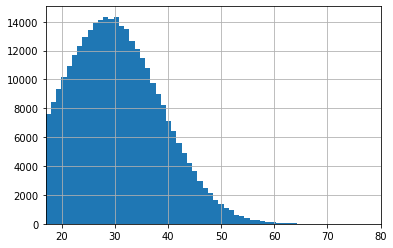

In [11]:
age = data['age']
age_max = age.max()
age_min = age.min()
age_range = age_max - age_min

age.hist(bins=age_range+1)
plt.xlim([age_min,age_max+1])

**Observation**: the user base of this site is pretty young. 

In [12]:
data_by_source = data.groupby('source')  # group by country
d_source_count = data_by_source.size()   # count the number of items in each group
d_source_sum   = d_source_count.sum()    # the number of items

df_source = pd.DataFrame({'Count' : d_source_count, 'Percent' : d_source_count/d_source_sum})
df_source

,Count,Percent
source,,
Ads,88739,0.280644
Direct,72420,0.229034
Seo,155039,0.490323


**Observation**: nearly half of the customers came to the site by clicking search result. 

### Exploratory Data Analysis

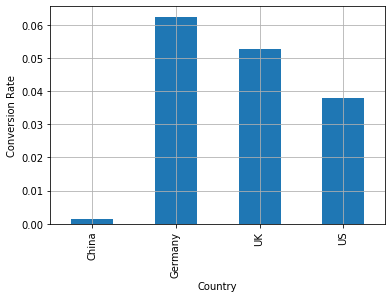

In [13]:
data_by_country = data.groupby('country')
conversion_country = data_by_country['converted'].mean()

conversion_country.plot.bar()
plt.xlabel('Country')
plt.ylabel('Conversion Rate')
plt.grid()

**Observation:**  Here it clearly looks like Chinese convert at a much lower rate than other countries, while Germany is the best.

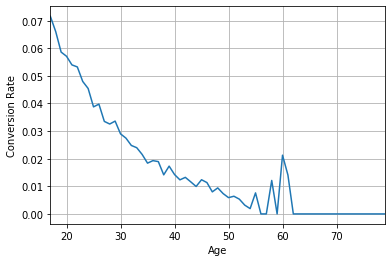

In [14]:
data_by_age = data.groupby('age')
conversion_age = data_by_age['converted'].mean()

conversion_age.plot()
plt.xlabel('Age');
plt.ylabel('Conversion Rate');
plt.grid()

In [15]:
# create regular age bins with 5-year intervals
age_bins = pd.IntervalIndex.from_tuples([(x, x+5) for x in range(15, 80, 5)])
data['age_group'] = pd.cut(data['age'], age_bins)
data.head(3) # now we have a new column with discretized age groups

,country,age,new_user,source,total_pages_visited,converted,age_group
0,UK,25,1,Ads,1,0,"(20, 25]"
1,US,23,1,Seo,5,0,"(20, 25]"
2,US,28,1,Seo,4,0,"(25, 30]"


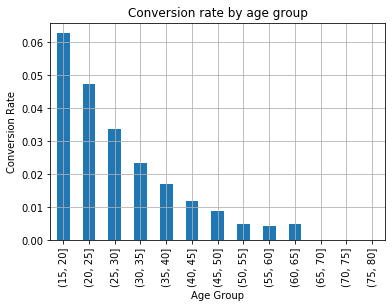

In [16]:
data_age_group = data.groupby('age_group')
conversion_age_group = data_age_group['converted'].mean()

conversion_age_group.plot.bar()
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion rate by age group')
plt.grid()

**Observation:** We can see that this site works very well for young people and bad for less young people.

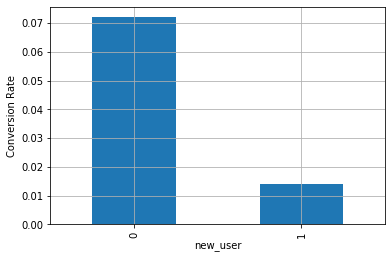

In [17]:
data_by_new_user = data.groupby('new_user')
conversion_new_user = data_by_new_user['converted'].mean()

conversion_new_user.plot.bar()
plt.xlabel('new_user')
plt.ylabel('Conversion Rate')
plt.grid()

**Observation:** We see that existing users are much better than new users.

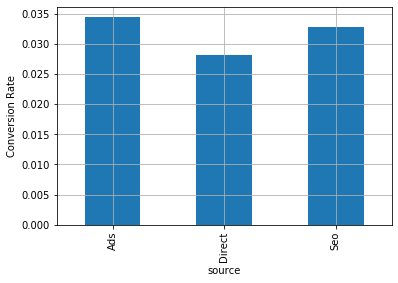

In [18]:
data_by_source = data.groupby('source')
conversion_source = data_by_source['converted'].mean()

conversion_source.plot.bar()
plt.xlabel('source');
plt.ylabel('Conversion Rate');
plt.grid()

**Observation:** We see that the conversion is quite similar for all sources. 

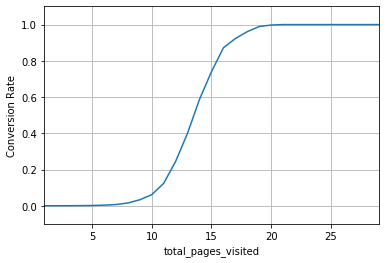

In [19]:
data_by_total_pages_visited = data.groupby('total_pages_visited')
conversion_total_pages_visited = data_by_total_pages_visited['converted'].mean()


conversion_total_pages_visited.plot()

plt.xlabel('total_pages_visited');
plt.ylabel('Conversion Rate');

plt.ylim([-0.1,1.1])
plt.grid()

**Observation:**  We see higher conversion rate for customers visited more pages. However, this is least **actionable**. It's understandable that customers visit many pages because they already want to buy. Also, in order to buy you have to click on multiple pages.

### Actionable Insights
Recall that the project is to analyse the conversion rate of different customer segments, and then come up with recommendations for the product team and the marketing team to improve the conversion rate. 

<img src="images/action_items.jpg">

## <font color='#1A9FFF'>Mini project</font>

## <font color='#1A9FFF'>Mini project 1 - IMDB Movie</font>

The data of this dataset comes from the Top 100 Movies List of All Time in IMDb. Movies recorded in this dataset are in this decade (between 2010-2016). There are 118 movies included in this dataset, and each movie entry bears 54 attributes. Most of the attributes are related to the rating. The goal of this dataset is to help us understand the success of movies with high rating.

**The project aims to:**

* What are the characteristics of top movies?
* Are there any trend of top movies, for example, genre, budget, targeted age group or gender?

## <font color='#1A9FFF'>Mini project 2 - Student Grade</font>

This dataset is a survey obtained of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. From this dataset, we can find some relationship of certain information with their final grades.

**The project aims to:**
* Analyse the grade distribution for Math and Portuguese courses in this secondary school
* Analyse and point out the different factors that may have affected the final grade (G3) of student for Math course

## <font color='#1A9FFF'>Mini project 3 - Camera Property</font>

We have a dataset of about 1000 cameras with 13 properties such as weight, focal length, price, etc. These cameras belong to 12 companys such as Canon, HP, Sony, etc, each company is represented by a code, refer to the first column of the dataset.

**The project aims to:**
* For each company/camera series, what is the trend of  different properties over time?
* For all cameras released, what is the trend of different properties over time?
* Compare the properties of cameras produced by different companies.
* Compare the properties of cameras produced by different companies in some years.